# Salut !
Ce Notebook est une prémiere aproximation exploratoire aux images satellitaire du projet fil rouge.
Dans ce Notebook:
- Utilisation de la bibliothéque rasterio pour extraire les bandes des images satellitaires.
- Exploration de la taille des images.
- Affichages des images ("true color" images) c.a.d RGB


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# from osgeo import gdal, gdal_array

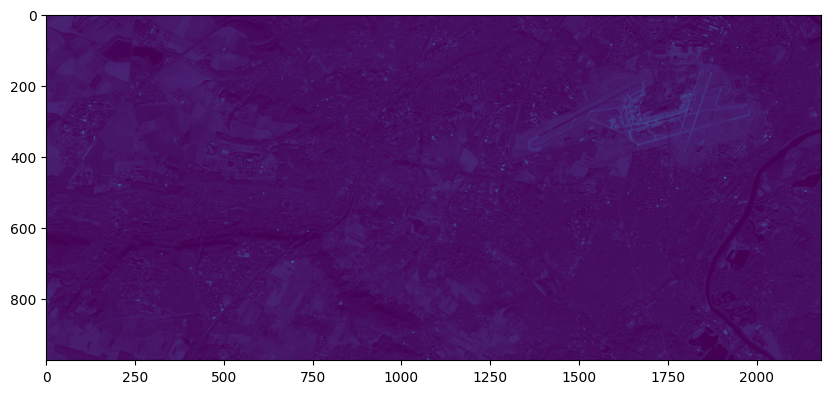

In [3]:
# image_test = cv2.imread("/home/julian/Fil_Rouge/crop_SENTINEL2A_20151226-111142-750_L2A_T31UDQ_D_V1-1.tif")
path_image = "../data/raw/crop_SENTINEL2A_20151226-111142-750_L2A_T31UDQ_D_V1-1.tif"
image_test = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(10,10))
plt.imshow(image_test)
plt.show()

In [4]:
with rasterio.open(path_image) as src:
    data = src.read() # gets ALL the data
    single_band = data[0] # gets the first band OR src.read(1)

image = reshape_as_image(data)

print(f'After reshaping as image: {image.shape}')

reshaped_to_raster = reshape_as_raster(image)

print(f'After reshaping as raster: {reshaped_to_raster.shape}')

print('---------------')

print(f'first band, or a single band image: {single_band.shape}')

added_dimension = np.expand_dims(single_band, axis=2)

print(f'After adding a dimension: {added_dimension.shape}')
print('---------------')
print(added_dimension[:,:,0])

After reshaping as image: (973, 2182, 4)
After reshaping as raster: (4, 973, 2182)
---------------
first band, or a single band image: (973, 2182)
After adding a dimension: (973, 2182, 1)
---------------
[[1377 1414 1430 ... 1211 1248  975]
 [1476 1531 1579 ... 1753 1184  730]
 [1579 1657 1666 ... 1176  539  370]
 ...
 [2497 2473 2595 ... 1532  978  933]
 [2564 2544 2518 ... 1160  900  889]
 [2597 2626 2607 ... 1055  862  800]]


In [5]:
src = rasterio.open(path_image)
red = src.read(2)
green = src.read(3)
blue = src.read(4)
nri = src.read(1)

print(red.min())
print(red.max())

0
17046


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


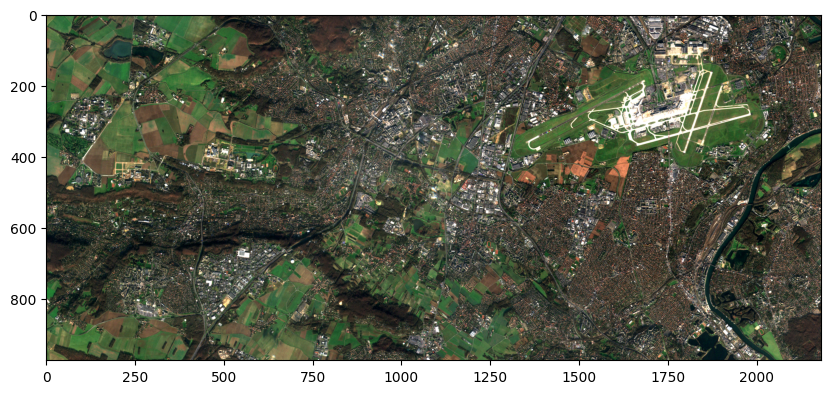

In [7]:
#Taking info from: https://medium.com/artefact-engineering-and-data-science/leveraging-satellite-imagery-for-machine-learning-computer-vision-applications-d22143f72d94

# Changing the intensity of the pixels to obtain a better representation
redn = (red/6).astype(int)
greenn = (green/6).astype(int)
bluen = (blue/6).astype(int)
nirn = (nri/6).astype(int)


# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [31]:
output_notebook()

Loading BokehJS ...

In [35]:
N = 20
img = np.empty((N,N), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255)
        view[i, j, 1] = 158
        view[i, j, 2] = int(j/N*255)
        view[i, j, 3] = 255

p = figure(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.x_range.range_padding = p.y_range.range_padding = 0

# must give a vector of images
p.image_rgba(image=[img], x=0, y=0, dw=10, dh=10)

show(p)

In [34]:
import numpy as np

from bokeh.plotting import figure, show

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = np.array([(r, g, 150) for r, g in zip(50+2*x, 30+2*y)], dtype="uint8")

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.image(rgb[:,:,0])

show(p)

RuntimeError: Columns need to be 1D (image is not)

In [ ]:
p = figure()
p.image(rgb, x=0, y=0, dw=10, dh=10, palette="Spectral11")
show(p)

RuntimeError: Columns need to be 1D (image is not)